In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('analysis_table.csv')

In [3]:
df.head()

,order_id,customer_id,order_status,order_purchase_time,order_approved,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,product_category_name,order_item_id,freight_value,reviews_score
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,13/09/2017 08:59,13/09/2017 09:45,19/09/2017 18:34,20/09/2017 23:43,29/09/2017 00:00,58.90,cool_stuff,1.0,13.29,5.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,26/04/2017 10:53,26/04/2017 11:05,04/05/2017 14:35,12/05/2017 16:04,15/05/2017 00:00,239.90,pet_shop,1.0,19.93,4.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,14/01/2018 14:33,14/01/2018 14:48,16/01/2018 12:36,22/01/2018 13:19,05/02/2018 00:00,199.00,moveis_decoracao,1.0,17.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,08/08/2018 10:00,08/08/2018 10:10,10/08/2018 13:28,14/08/2018 13:32,20/08/2018 00:00,12.99,perfumaria,1.0,12.79,4.0
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,15/05/2017 21:42,17/05/2017 03:55,17/05/2017 11:05,22/05/2017 13:44,06/06/2017 00:00,21.90,utilidades_domesticas,1.0,12.69,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114092 non-null  object 
 1   customer_id                    114092 non-null  object 
 2   order_status                   114092 non-null  object 
 3   order_purchase_time            114092 non-null  object 
 4   order_approved                 113930 non-null  object 
 5   order_delivered_carrier_date   112112 non-null  object 
 6   order_delivered_customer_date  110839 non-null  object 
 7   order_estimated_delivery_date  114092 non-null  object 
 8   price                          113314 non-null  float64
 9   product_category_name          111702 non-null  object 
 10  order_item_id                  113314 non-null  float64
 11  freight_value                  113314 non-null  float64
 12  reviews_score                 

In [5]:
# changing data type into datetime
date_cols = ['order_purchase_time','order_approved', 'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
df[date_cols] = df[date_cols].apply(pd.to_datetime)

C:\Users\aminh\AppData\Local\Temp\ipykernel_39372\481634424.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_cols] = df[date_cols].apply(pd.to_datetime)
C:\Users\aminh\AppData\Local\Temp\ipykernel_39372\481634424.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_cols] = df[date_cols].apply(pd.to_datetime)
C:\Users\aminh\AppData\Local\Temp\ipykernel_39372\481634424.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_cols] = df[date_cols].apply(pd.to_datetime)
C:\Users\aminh\AppData\Local\Temp\ipykernel_39372\481634424.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114092 non-null  object        
 1   customer_id                    114092 non-null  object        
 2   order_status                   114092 non-null  object        
 3   order_purchase_time            114092 non-null  datetime64[ns]
 4   order_approved                 113930 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112112 non-null  datetime64[ns]
 6   order_delivered_customer_date  110839 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114092 non-null  datetime64[ns]
 8   price                          113314 non-null  float64       
 9   product_category_name          111702 non-null  object        
 10  order_item_id                  113314 non-null  float64       
 11  

In [7]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_time                 0
order_approved                    162
order_delivered_carrier_date     1980
order_delivered_customer_date    3253
order_estimated_delivery_date       0
price                             778
product_category_name            2390
order_item_id                     778
freight_value                     778
reviews_score                     961
dtype: int64

In [8]:
df_edit = df.dropna()

In [9]:
df_edit.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_time              0
order_approved                   0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
price                            0
product_category_name            0
order_item_id                    0
freight_value                    0
reviews_score                    0
dtype: int64

In [10]:
# Creating new column deliver time which calculates the time taken to deliver to customer from when the order was purchased
df_edit['deliver_time'] = df_edit['order_delivered_customer_date'] - df_edit['order_purchase_time']
df_edit['deliver_time'] 

C:\Users\aminh\AppData\Local\Temp\ipykernel_39372\2063101718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edit['deliver_time'] = df_edit['order_delivered_customer_date'] - df_edit['order_purchase_time']


0         7 days 14:44:00
1        16 days 05:11:00
2         7 days 22:46:00
3         6 days 03:32:00
4         6 days 16:02:00
               ...       
113696    2 days 23:57:00
113697    6 days 07:50:00
113698   20 days 21:56:00
113699   20 days 21:56:00
113700   21 days 01:50:00
Name: deliver_time, Length: 108464, dtype: timedelta64[ns]

In [11]:
df_edit

,order_id,customer_id,order_status,order_purchase_time,order_approved,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,product_category_name,order_item_id,freight_value,reviews_score,deliver_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,58.90,cool_stuff,1.0,13.29,5.0,7 days 14:44:00
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,239.90,pet_shop,1.0,19.93,4.0,16 days 05:11:00
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,199.00,moveis_decoracao,1.0,17.87,5.0,7 days 22:46:00
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,12.99,perfumaria,1.0,12.79,4.0,6 days 03:32:00
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:00,2017-05-17 03:55:00,2017-05-17 11:05:00,2017-05-22 13:44:00,2017-06-06,21.90,utilidades_domesticas,1.0,12.69,4.0,6 days 16:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113696,fff6889749958e42b47a7977a4cf0ea0,c5d108ecadaedf367e995520d36c9b1d,delivered,2017-09-25 22:41:00,2017-09-25 22:56:00,2017-09-27 12:59:00,2017-09-28 22:38:00,2017-10-10,92.00,malas_acessorios,1.0,31.60,4.0,2 days 23:57:00
113697,fff6b8ca971f8e3ec822e99d0f2d3d21,2aec499f94f5e82786629a84b816ffb9,delivered,2017-09-15 11:44:00,2017-09-15 12:04:00,2017-09-18 16:47:00,2017-09-21 19:34:00,2017-10-04,199.00,telefonia,1.0,16.83,5.0,6 days 07:50:00
113698,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:00,2018-03-17 12:29:00,2018-03-21 19:22:00,2018-04-07 10:07:00,2018-04-19,180.00,informatica_acessorios,1.0,48.14,5.0,20 days 21:56:00
113699,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:00,2018-03-17 12:29:00,2018-03-21 19:22:00,2018-04-07 10:07:00,2018-04-19,180.00,informatica_acessorios,2.0,48.14,5.0,20 days 21:56:00


In [12]:
# checking if all orders get delivered same time regardless of number of products bought
conflicts = df_edit.groupby('order_id')['deliver_time'].nunique()
conflicting_orders = conflicts[conflicts > 1]
print(conflicting_orders)

Series([], Name: deliver_time, dtype: int64)


In [13]:
lower_quartile = df_edit[(df_edit['price'] < df_edit['price'].quantile(0.975))]

<Axes: xlabel='price', ylabel='Count'>

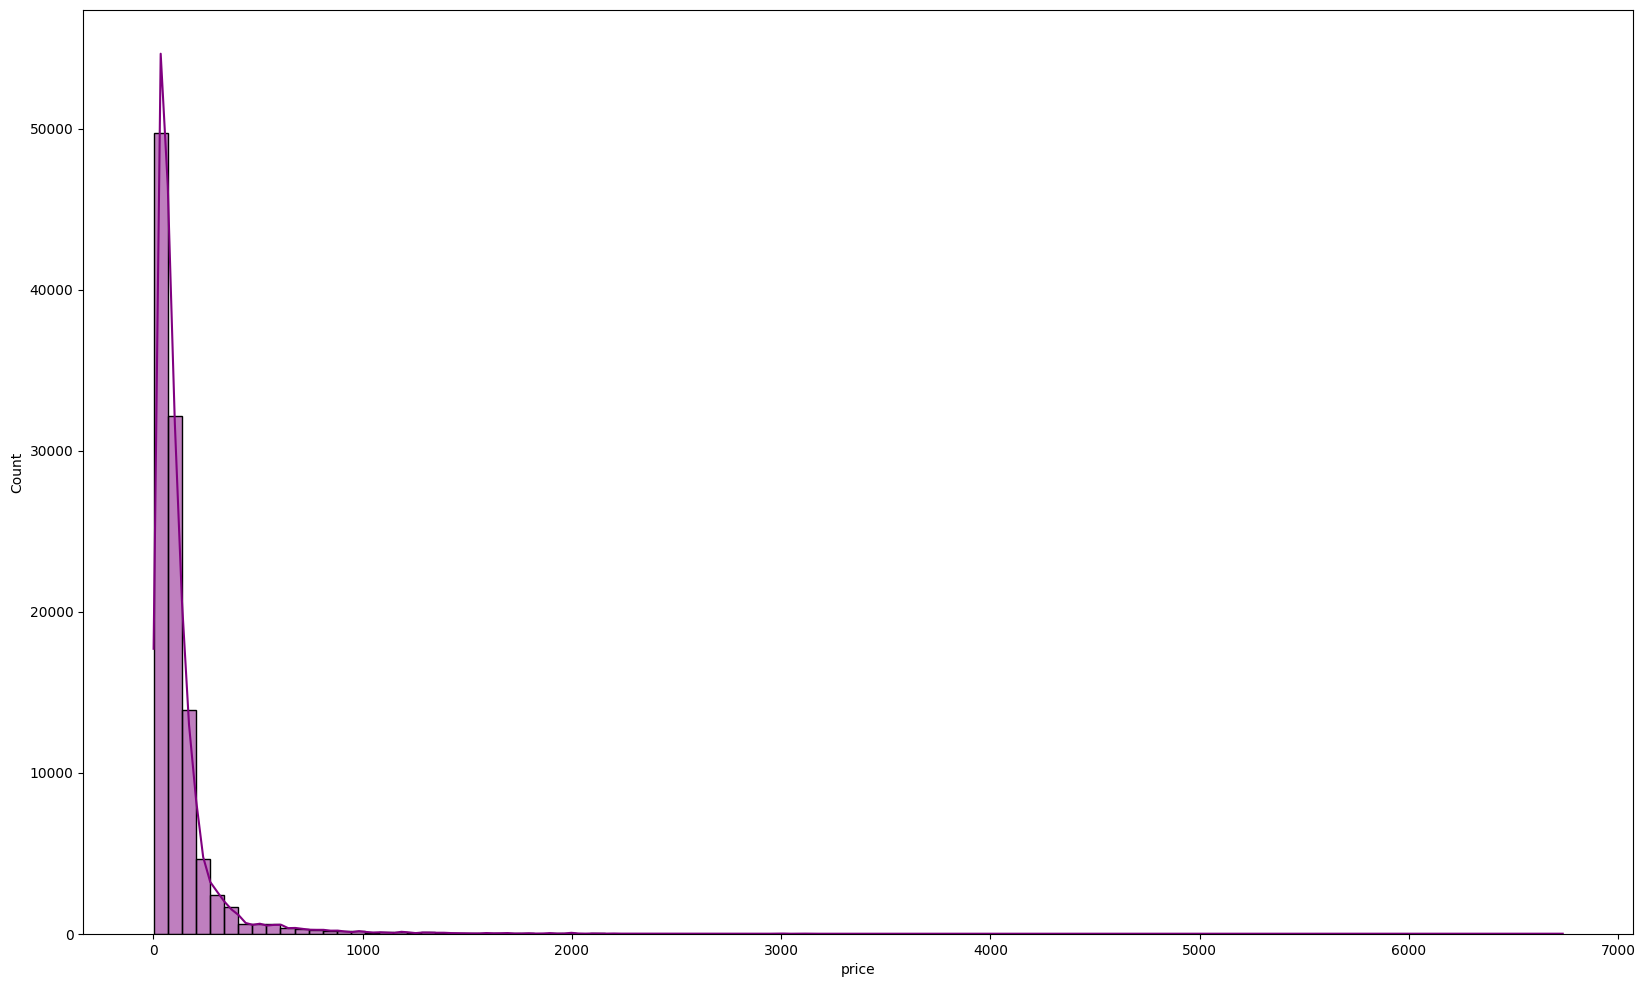

In [14]:
# Visualising the distrubution(spread) of price
plt.figure(figsize =(20,12))
sns.histplot(df_edit.price, kde=True, bins=100, color='purple')

In [15]:
df_edit.price.describe()

count    108464.000000
mean        119.814550
std         180.545357
min           0.850000
25%          39.900000
50%          74.900000
75%         134.000000
max        6735.000000
Name: price, dtype: float64

<Axes: >

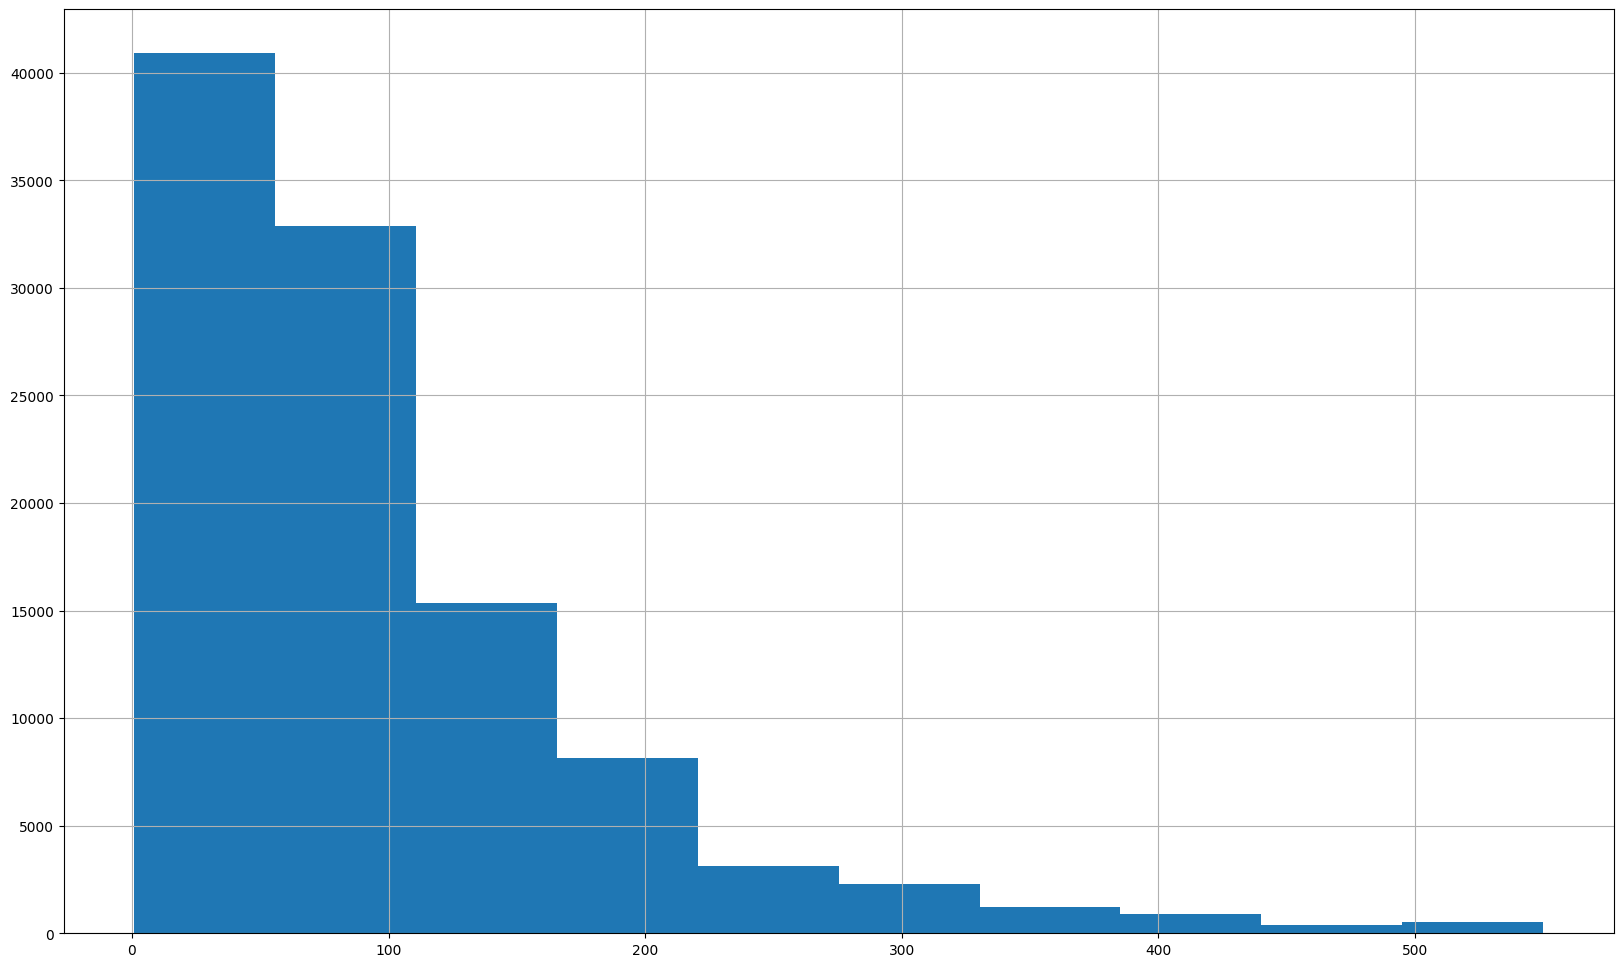

In [16]:
# using histogram for distribution of price
plt.figure(figsize =(20,12))
lower_quartile.price.hist()

<Axes: >

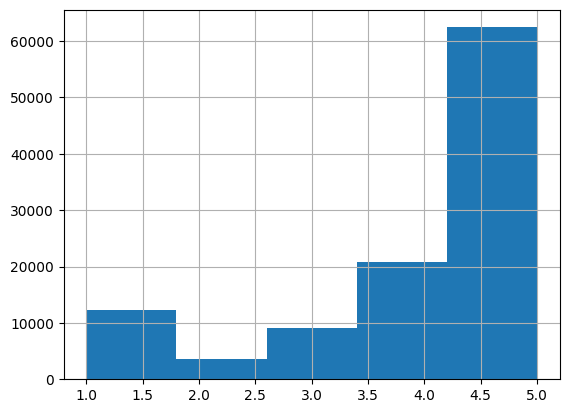

In [17]:
# distrubution of reviews score
df_edit.reviews_score.hist(bins=5)

<Axes: xlabel='freight_value', ylabel='Count'>

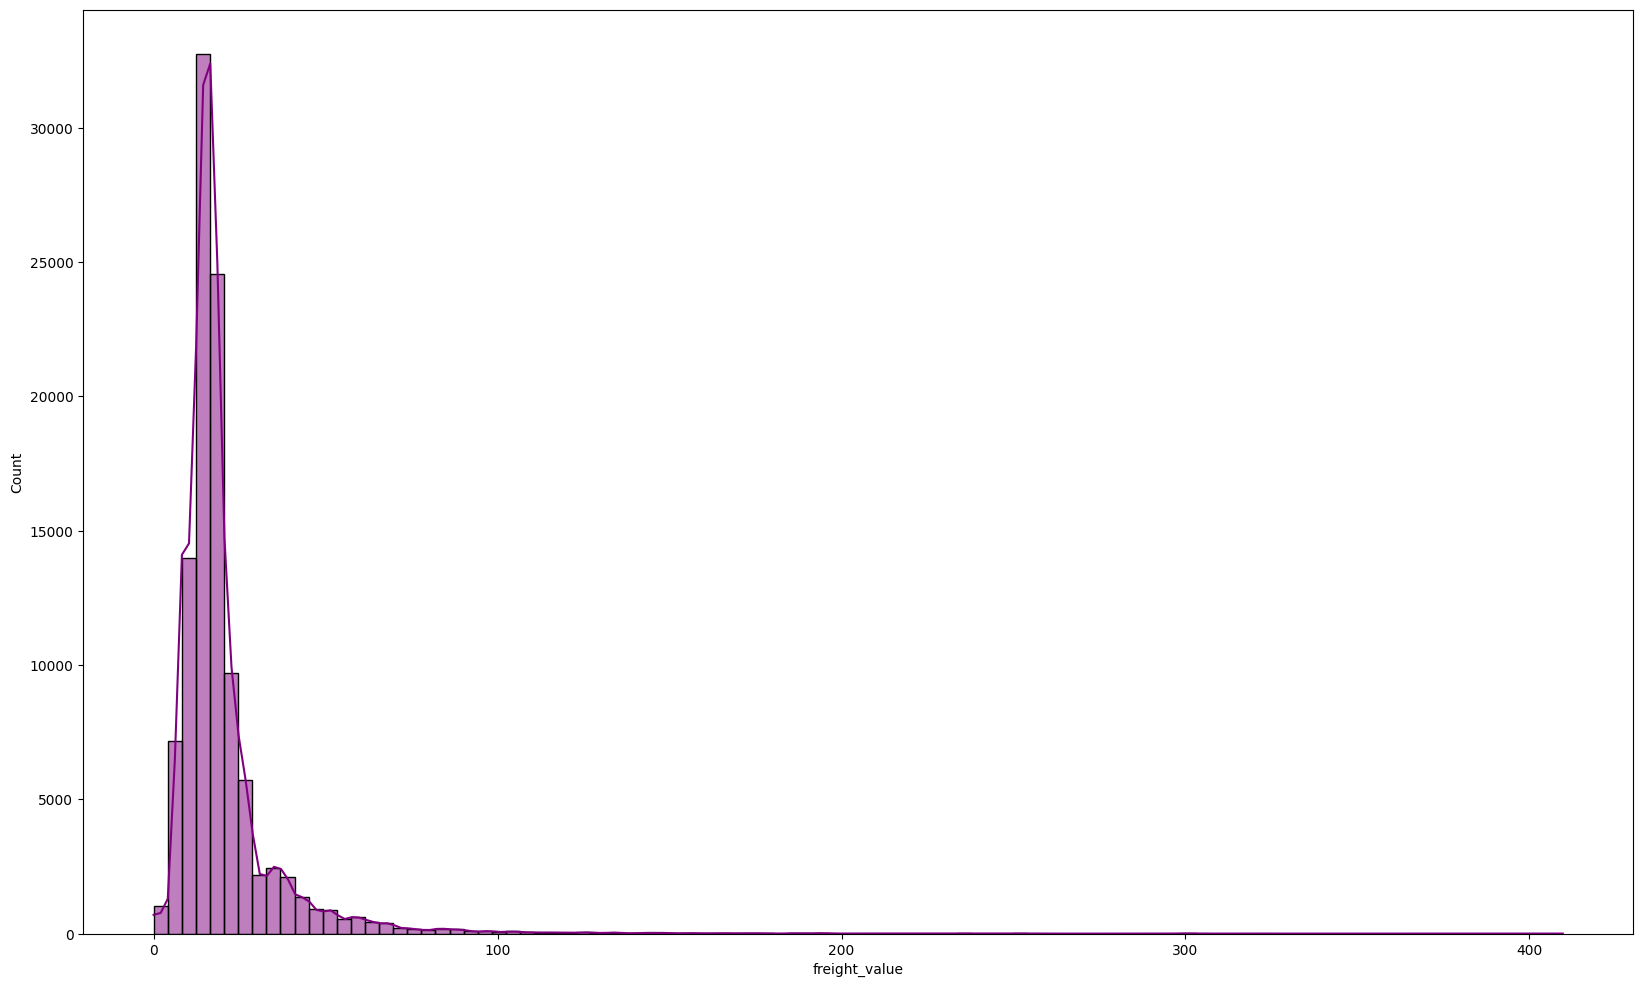

In [18]:
# Visualising the distrubution(spread) of freight value
plt.figure(figsize =(20,12))
sns.histplot(df_edit.freight_value, kde=True, bins=100, color='purple')

In [19]:
# Table that is grouped by order since one order can have multiple products bought
# this table shows total cost of the order and freight value
# overall reviews score of all products ordered
# delivery time is averaged since one order regardless of number of items gets delivered the same time
# total number of products bought per order is recorded as well
main_table = df_edit.groupby('order_id').agg(total_price = ('price','sum'),
                                       total_freight = ('freight_value','sum'),
                                       reviews = ('reviews_score', 'mean'),
                                       delivery_time = ('deliver_time', 'mean'),
                                        no_of_items_ordered = ('order_item_id', 'max'))
main_table

,total_price,total_freight,reviews,delivery_time,no_of_items_ordered
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,5.0,7 days 14:44:00,1.0
00018f77f2f0320c557190d7a144bdd3,239.90,19.93,4.0,16 days 05:11:00,1.0
000229ec398224ef6ca0657da4fc703e,199.00,17.87,5.0,7 days 22:46:00,1.0
00024acbcdf0a6daa1e931b038114c75,12.99,12.79,4.0,6 days 03:32:00,1.0
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,5.0,25 days 02:45:00,1.0
...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,299.99,43.41,5.0,17 days 08:59:00,1.0
fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,5.0,9 days 10:05:00,1.0
fffce4705a9662cd70adb13d4a31832d,99.90,16.95,5.0,4 days 19:15:00,1.0


<Axes: >

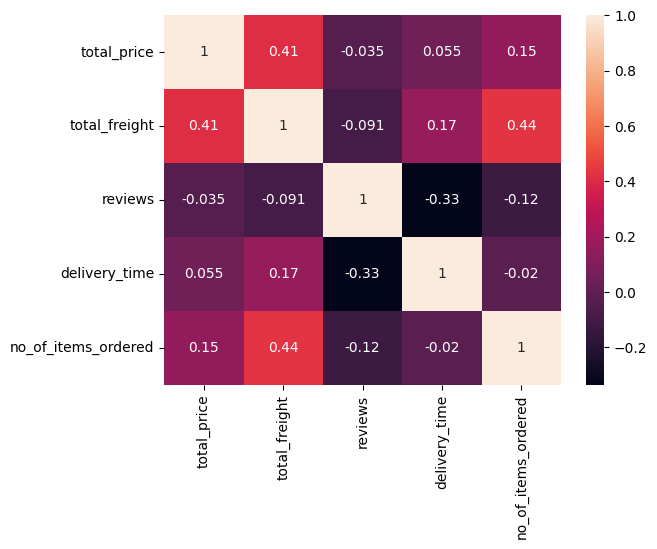

In [20]:
# finding correlation between numerical values
correlation= main_table.corr()
sns.heatmap(correlation, annot=True)

In [21]:
main_table['no_of_items_ordered'].mean()

1.1415463742962366

In [22]:
main_table['total_freight'].mean()

22.919071138297422

<Axes: xlabel='no_of_items_ordered', ylabel='Count'>

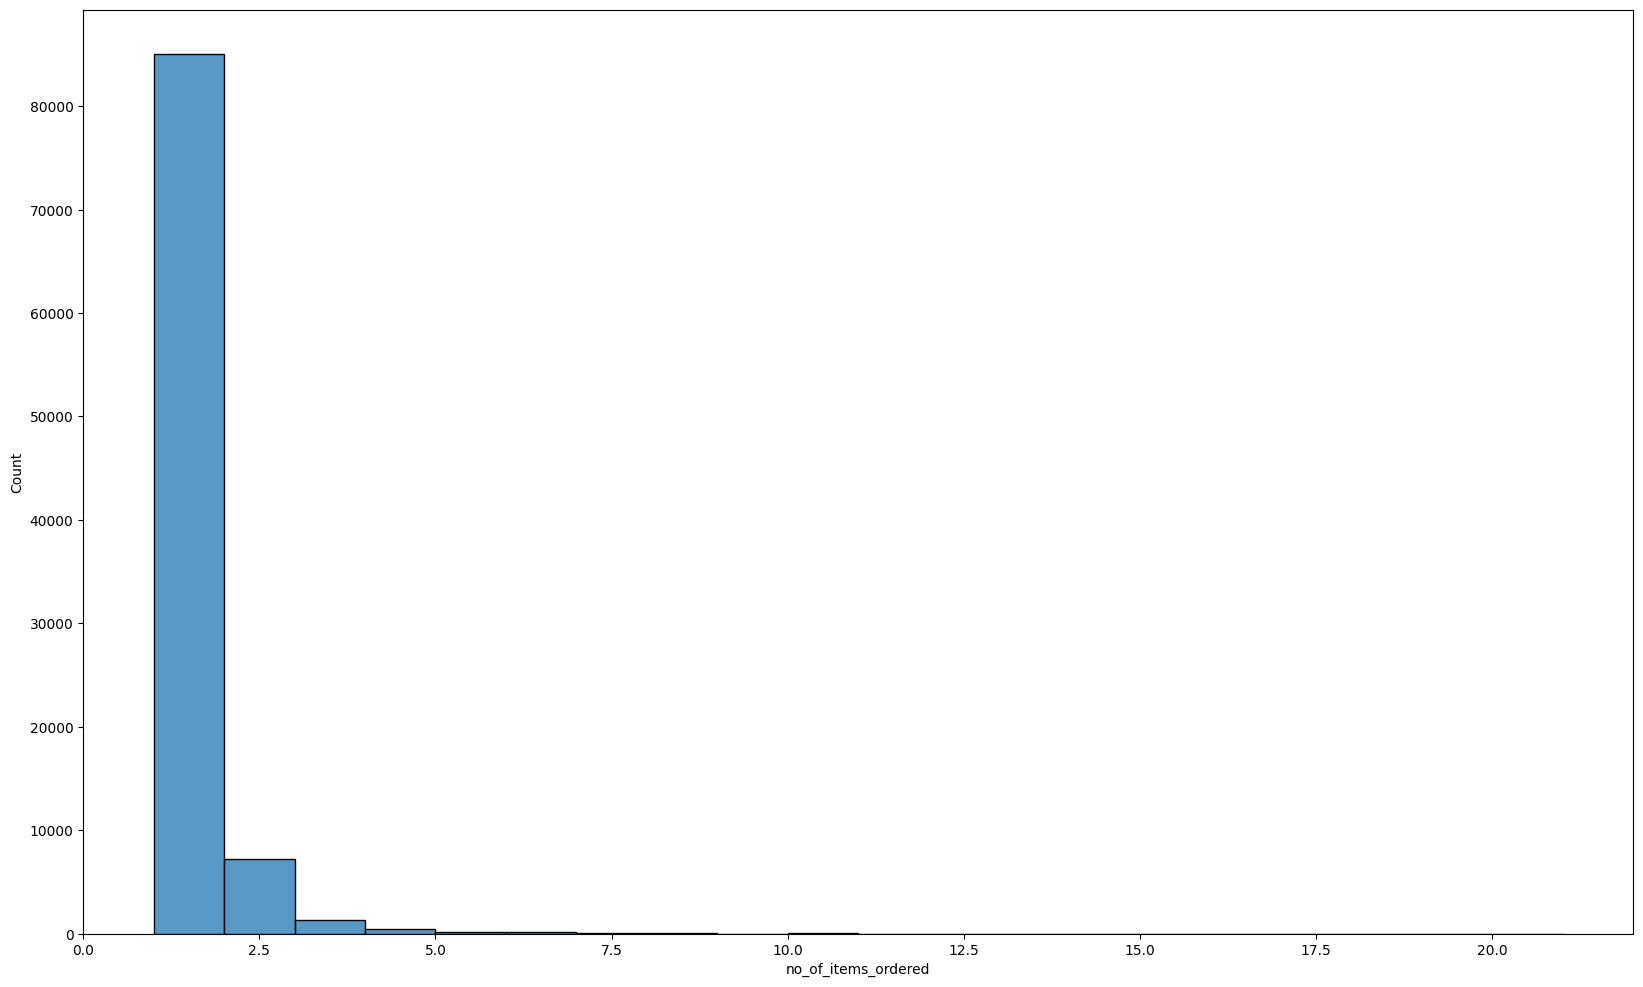

In [23]:
# Distribution of number of products bought per order
plt.figure(figsize =(20,12))
sns.histplot(data=main_table, x='no_of_items_ordered', binwidth=1)

In [24]:
main_table.no_of_items_ordered.describe()

count    94492.000000
mean         1.141546
std          0.535061
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: no_of_items_ordered, dtype: float64

Text(0.5, 1.0, 'Top 10 Products')

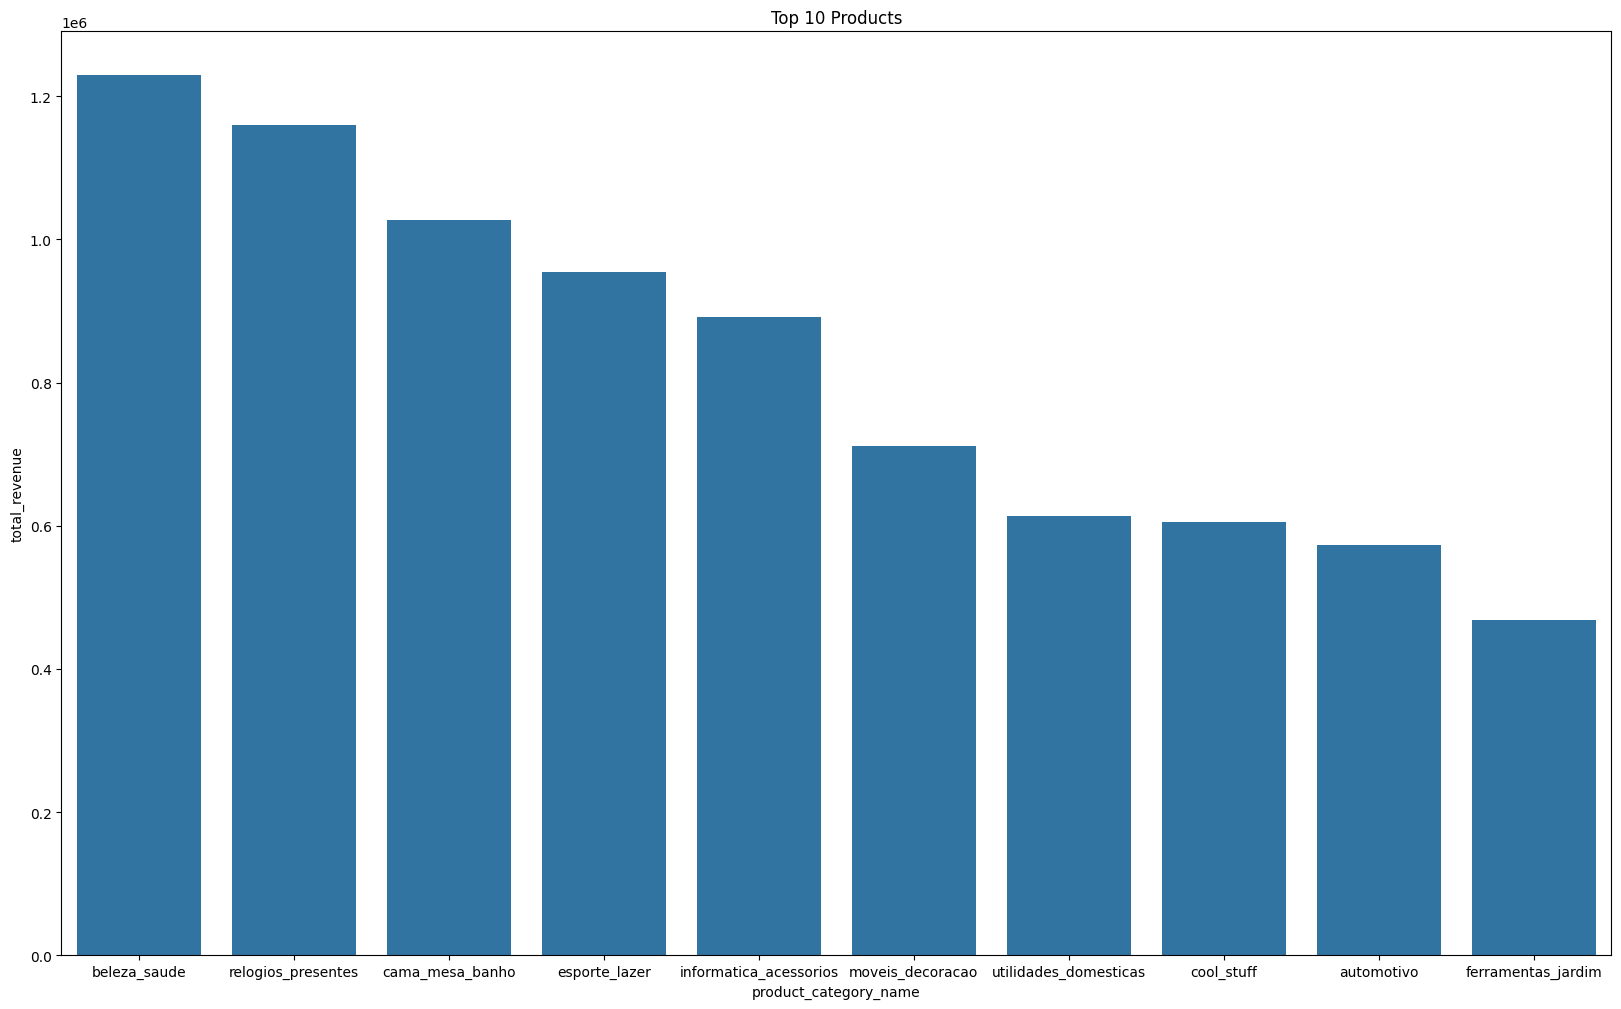

In [25]:
products_total = df_edit.groupby('product_category_name').agg(total_revenue = ('price', 'sum'))
top_10_products = products_total.sort_values(by='total_revenue', ascending=False)[:10]
top_10_products = top_10_products.reset_index()
plt.figure(figsize =(20,12))
sns.barplot(data=top_10_products, x='product_category_name', y='total_revenue').set_title('Top 10 Products')

In [26]:
top_10_products

,product_category_name,total_revenue
0,beleza_saude,1229066.70
1,relogios_presentes,1160011.57
2,cama_mesa_banho,1027199.66
3,esporte_lazer,954070.51
4,informatica_acessorios,892168.64
5,moveis_decoracao,711979.93
6,utilidades_domesticas,613843.72
7,cool_stuff,604848.84
8,automotivo,572632.84
9,ferramentas_jardim,468342.18


In [27]:
df_edit.order_purchase_time.dt.month.value_counts()

order_purchase_time
8     11811
5     11659
7     11258
3     10703
6     10395
4     10201
2      9224
1      8728
11     8349
12     6013
10     5459
9      4664
Name: count, dtype: int64

In [28]:
conditions = [
    df_edit['order_purchase_time'].dt.month.isin([12, 1, 2]),
    df_edit['order_purchase_time'].dt.month.isin([3, 4, 5]),
    df_edit['order_purchase_time'].dt.month.isin([6, 7, 8]),
    df_edit['order_purchase_time'].dt.month.isin([9, 10, 11])
]
choices = ['Winter', 'Spring', 'Summer', 'Fall']
df_edit.loc[:,'Season'] = np.select(conditions, choices)

C:\Users\aminh\AppData\Local\Temp\ipykernel_39372\2694663468.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edit.loc[:,'Season'] = np.select(conditions, choices)


In [29]:
seasonal = df_edit.groupby(['Season', 'product_category_name']).size().reset_index(name='count').sort_values(['Season', 'count'], ascending=[True, False])
seasonal

,Season,product_category_name,count
12,Fall,cama_mesa_banho,2057
53,Fall,moveis_decoracao,1555
31,Fall,esporte_lazer,1531
10,Fall,beleza_saude,1351
43,Fall,informatica_acessorios,1082
...,...,...,...
248,Winter,fashion_esporte,3
230,Winter,cds_dvds_musicais,1
258,Winter,la_cuisine,1
272,Winter,pc_gamer,1


In [30]:
seasonal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 12 to 278
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Season                 284 non-null    object
 1   product_category_name  284 non-null    object
 2   count                  284 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.9+ KB


In [31]:
top_10 = seasonal.groupby('Season').apply(lambda x: x.nlargest(10,'count'),include_groups=False)
Winter_top_10 = top_10.loc['Winter',:]
Fall_top_10 = top_10.loc['Fall',:]
Summer_top_10 = top_10.loc['Summer',:]
Spring_top_10 = top_10.loc['Spring',:]

In [32]:
def bar_plot(season, ax):
    sns.barplot(x=season['product_category_name'] , y=season['count'], ax=ax)
    ax.set_xlabel("Product")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

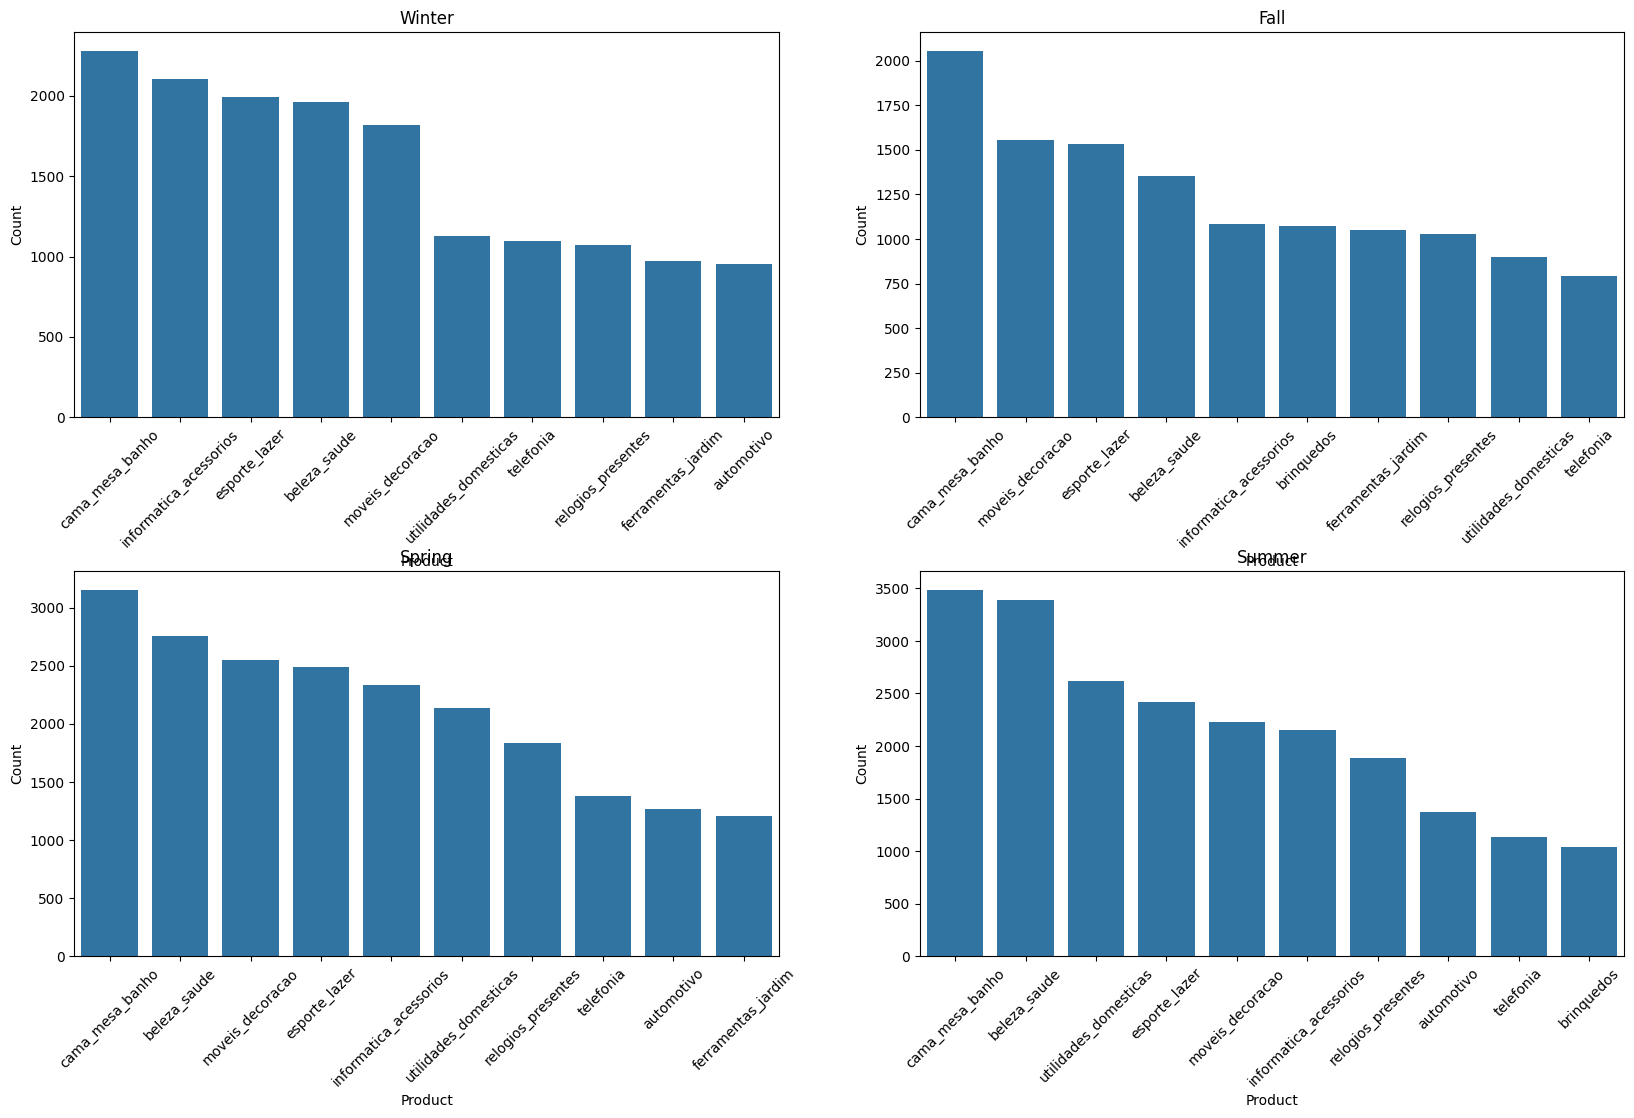

In [33]:
# Most bought products based on season
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axs[0,0].set_title('Winter')
axs[0,1].set_title('Fall')
axs[1,0].set_title('Spring')
axs[1,1].set_title('Summer')
plt.subplots_adjust(hspace=0.4)
bar_plot(Winter_top_10 , axs[0,0])
bar_plot(Fall_top_10, axs[0,1])
bar_plot(Spring_top_10, axs[1,0])
bar_plot(Summer_top_10, axs[1,1])

In [34]:
product_sorted= df_edit.groupby('product_category_name').size().reset_index(name='count').sort_values( 'count', ascending= False)[:10]
product_sorted

,product_category_name,count
13,cama_mesa_banho,10984
11,beleza_saude,9458
32,esporte_lazer,8434
54,moveis_decoracao,8155
44,informatica_acessorios,7671
72,utilidades_domesticas,6780
66,relogios_presentes,5823
70,telefonia,4406
40,ferramentas_jardim,4253
8,automotivo,4116


<Axes: xlabel='product_category_name', ylabel='count'>

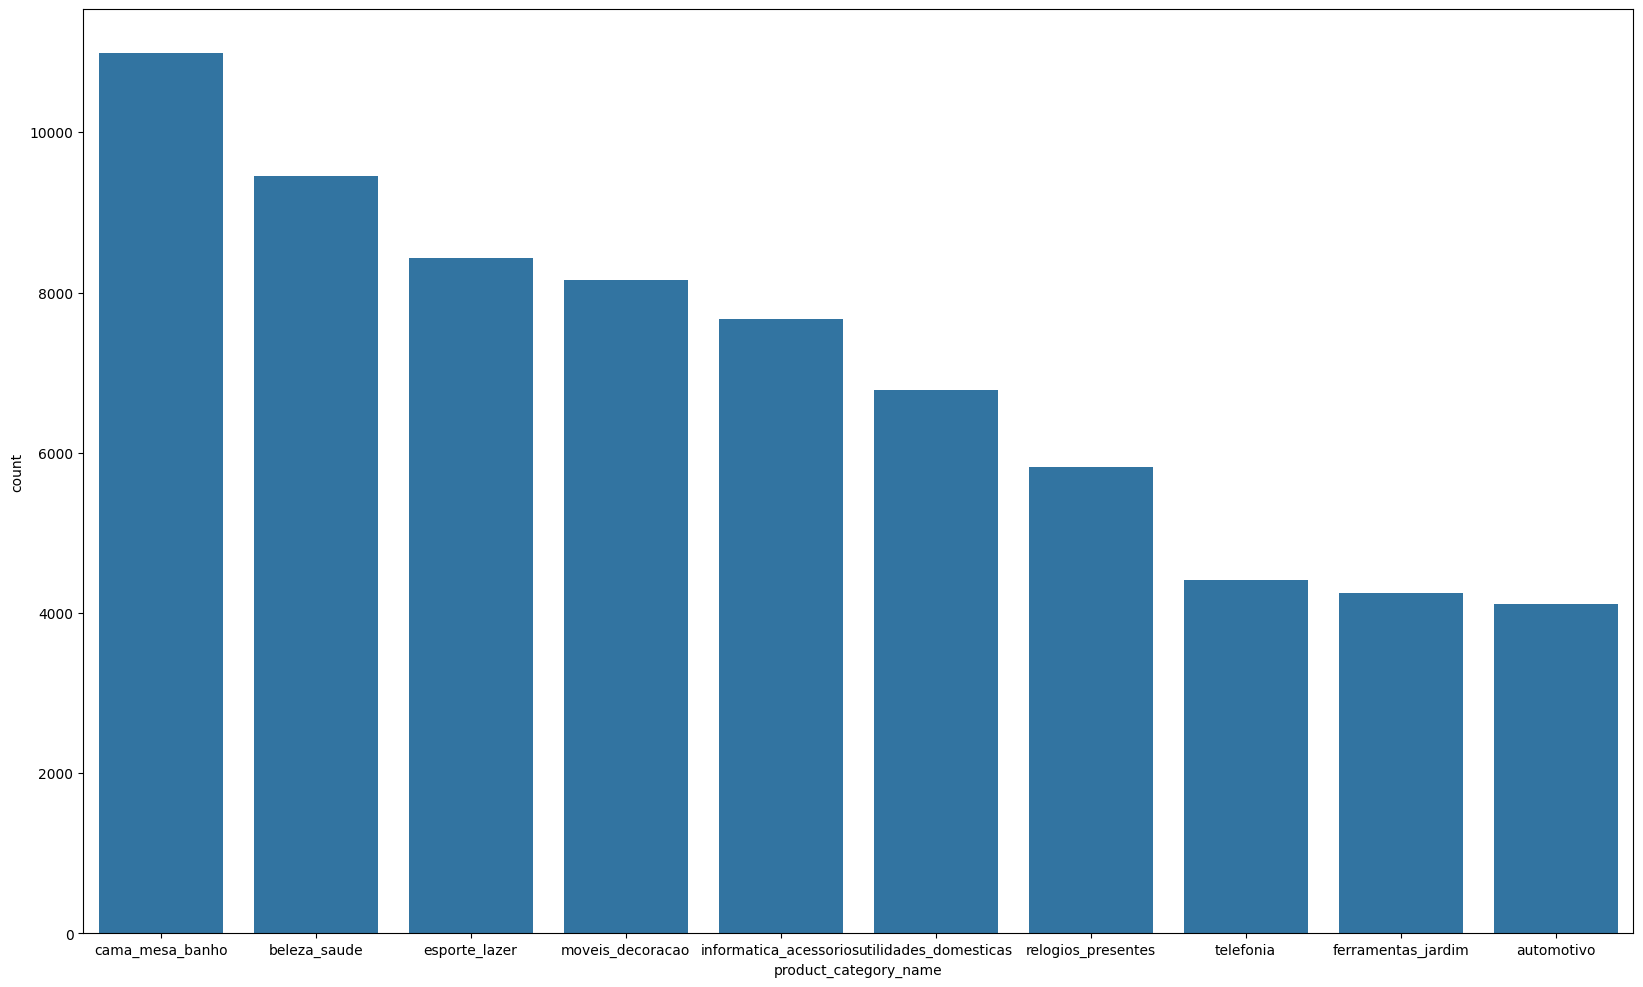

In [35]:
# Most bought prodcuts overall
plt.figure(figsize =(20,12))
sns.barplot(data=product_sorted, x='product_category_name' , y='count')

In [36]:
products_time = df_edit.groupby([df_edit['order_purchase_time'].dt.year,df_edit['order_purchase_time'].dt.month, 'product_category_name']).agg(number_of_products = ('product_category_name','count'))
products_time.index.names = ['year', 'month', 'products']
products_time = products_time.reset_index(['year','month'])
products_time

,year,month,number_of_products
products,,,
beleza_saude,2016,9,3
alimentos,2016,10,1
audio,2016,10,2
automotivo,2016,10,8
bebes,2016,10,11
...,...,...,...
relogios_presentes,2018,8,411
sinalizacao_e_seguranca,2018,8,22
telefonia,2018,8,269


<Axes: xlabel='year', ylabel='number_of_products'>

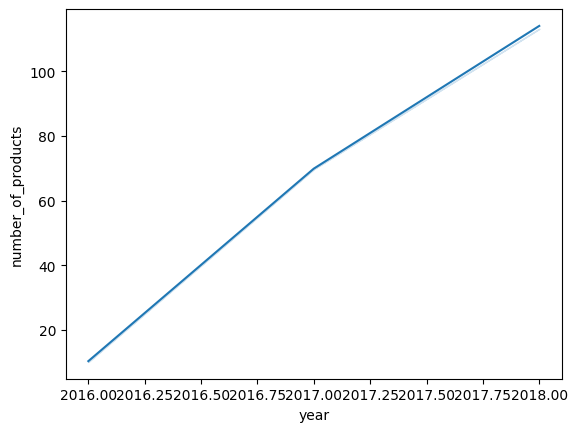

In [37]:
sns.lineplot(data=products_time, x='year', y='number_of_products', errorbar=('ci', False))

In [38]:
main_table

,total_price,total_freight,reviews,delivery_time,no_of_items_ordered
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,5.0,7 days 14:44:00,1.0
00018f77f2f0320c557190d7a144bdd3,239.90,19.93,4.0,16 days 05:11:00,1.0
000229ec398224ef6ca0657da4fc703e,199.00,17.87,5.0,7 days 22:46:00,1.0
00024acbcdf0a6daa1e931b038114c75,12.99,12.79,4.0,6 days 03:32:00,1.0
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,5.0,25 days 02:45:00,1.0
...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,299.99,43.41,5.0,17 days 08:59:00,1.0
fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,5.0,9 days 10:05:00,1.0
fffce4705a9662cd70adb13d4a31832d,99.90,16.95,5.0,4 days 19:15:00,1.0


In [39]:
reviews = df_edit.groupby('product_category_name').agg(average_reviews = ('reviews_score','mean'),
                                                       product_count = ('reviews_score','count'))
reviews_sorted = reviews.sort_values(by='average_reviews', ascending= False)[:10]
reviews_sorted.reset_index('product_category_name')

,product_category_name,average_reviews,product_count
0,fashion_roupa_infanto_juvenil,5.000000,7
1,cds_dvds_musicais,4.642857,14
2,livros_interesse_geral,4.511278,532
3,livros_importados,4.508772,57
4,construcao_ferramentas_ferramentas,4.444444,99
5,portateis_casa_forno_e_cafe,4.438356,73
6,flores,4.419355,31
7,livros_tecnicos,4.393939,264
8,alimentos_bebidas,4.369004,271
9,fashion_esporte,4.366667,30


In [40]:
df_edit.groupby('product_category_name').agg(highest_reviews = ('reviews_score','std')).loc['seguros_e_servicos',:]

highest_reviews    2.12132
Name: seguros_e_servicos, dtype: float64

<Axes: xlabel='product_category_name', ylabel='average_reviews'>

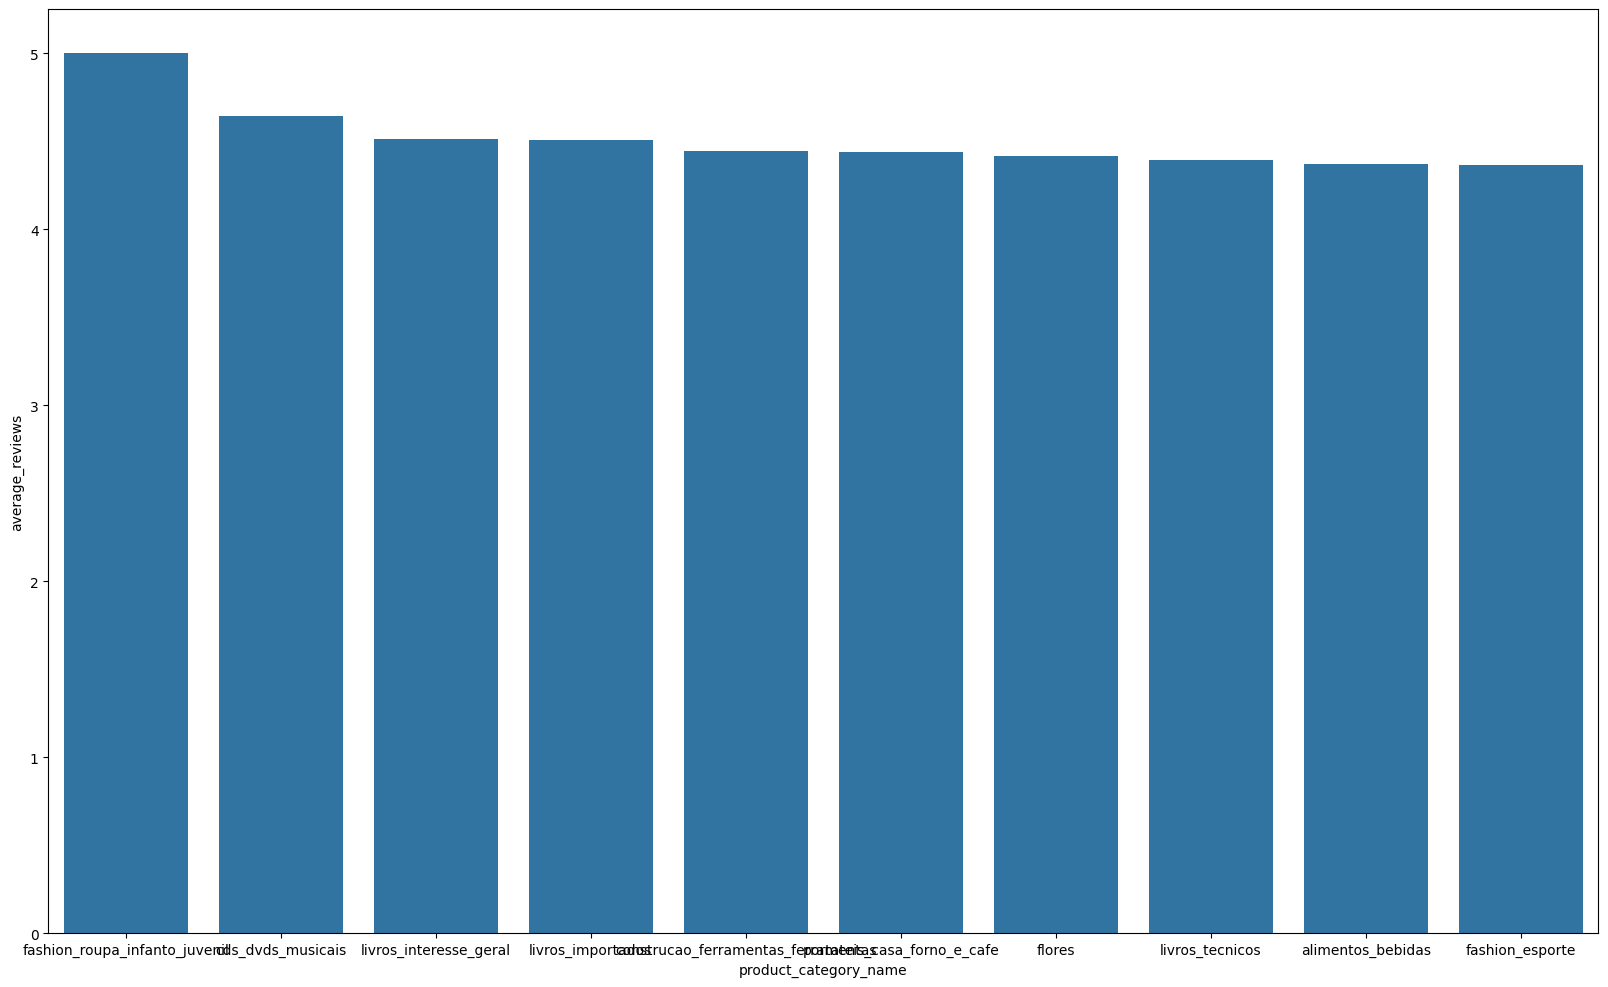

In [41]:
# Top 10 products based on average reviews per product
plt.figure(figsize=(20,12))
sns.barplot(data=reviews_sorted, x='product_category_name', y='average_reviews')

In [42]:
lowest_reviews = reviews.sort_values(by='average_reviews')[:10]
lowest_reviews

,average_reviews,product_count
product_category_name,,
seguros_e_servicos,2.500000,2
fraldas_higiene,3.378378,37
portateis_cozinha_e_preparadores_de_alimentos,3.428571,14
moveis_escritorio,3.517428,1664
pc_gamer,3.625000,8
casa_conforto_2,3.629630,27
fashion_roupa_masculina,3.758065,124
telefonia_fixa,3.758893,253
audio,3.830084,359


In [43]:
product_sorted_by_lowest = df_edit.groupby('product_category_name').size().reset_index(name='count').sort_values( 'count')[:10]
product_sorted_by_lowest 

,product_category_name,count
67,seguros_e_servicos,2
37,fashion_roupa_infanto_juvenil,7
60,pc_gamer,8
46,la_cuisine,13
17,cds_dvds_musicais,14
65,portateis_cozinha_e_preparadores_de_alimentos,14
4,artes_e_artesanato,24
15,casa_conforto_2,27
35,fashion_esporte,30
41,flores,31


In [44]:
df_edit[df_edit['product_category_name'] == 'fashion_roupa_infanto_juvenil']

,order_id,customer_id,order_status,order_purchase_time,order_approved,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,product_category_name,order_item_id,freight_value,reviews_score,deliver_time,Season
13585,3da4b0f0c89bb8fee8a810459e641414,2415312e36eac3ab3819f5b7f32522e5,delivered,2017-06-08 16:46:00,2017-06-08 18:20:00,2017-06-12 15:31:00,2017-06-13 13:23:00,2017-06-23,110.00,fashion_roupa_infanto_juvenil,1.0,8.96,5.0,4 days 20:37:00,Summer
41624,bc3ac768a8963f4ca68942ea6558fc9f,7968f8e8d5429c6a0611671f5a52ed2b,delivered,2018-03-21 09:40:00,2018-03-22 03:09:00,2018-03-22 21:54:00,2018-03-27 20:14:00,2018-04-10,39.99,fashion_roupa_infanto_juvenil,1.0,6.43,5.0,6 days 10:34:00,Spring
92282,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,delivered,2017-10-08 23:51:00,2017-10-09 00:17:00,2017-10-10 20:52:00,2017-10-16 21:59:00,2017-11-08,39.99,fashion_roupa_infanto_juvenil,1.0,14.10,5.0,7 days 22:08:00,Fall
98156,b99217b1fcf2fdeace7b8d869b76cb91,8325d6e7af2f2bfb58cf040729b232dd,delivered,2018-03-07 17:42:00,2018-03-07 17:55:00,2018-03-08 20:09:00,2018-03-15 22:04:00,2018-04-02,39.99,fashion_roupa_infanto_juvenil,1.0,10.15,5.0,8 days 04:22:00,Spring
101963,cab08f0417a702d0f4782ec02356a4ac,f4b4417d306cbf8c55ea65c89d0261f7,delivered,2017-09-30 18:54:00,2017-10-03 04:28:00,2017-10-03 18:54:00,2017-10-30 12:37:00,2017-11-01,89.99,fashion_roupa_infanto_juvenil,1.0,17.07,5.0,29 days 17:43:00,Fall
102117,cb53f0b6e8f9082a9f5a113765dd1236,035c08a68b237ef4afc82109e61a7380,delivered,2018-06-03 22:34:00,2018-06-03 22:50:00,2018-06-04 15:15:00,2018-06-05 21:52:00,2018-06-28,89.99,fashion_roupa_infanto_juvenil,1.0,7.49,5.0,1 days 23:18:00,Summer
109878,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,delivered,2017-05-17 17:44:00,2017-05-17 17:55:00,2017-05-18 16:28:00,2017-05-20 08:44:00,2017-06-09,110.00,fashion_roupa_infanto_juvenil,1.0,14.52,5.0,2 days 15:00:00,Spring


In [45]:
product_count = df_edit.groupby('product_category_name').agg(count = ('order_item_id', 'count'))
product_count.sort_values(by='count', ascending=False)

,count
product_category_name,
cama_mesa_banho,10984
beleza_saude,9458
esporte_lazer,8434
moveis_decoracao,8155
informatica_acessorios,7671
...,...
portateis_cozinha_e_preparadores_de_alimentos,14
la_cuisine,13
pc_gamer,8


In [46]:
df_edit.reviews_score.describe()

count    108464.000000
mean          4.083134
std           1.345840
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: reviews_score, dtype: float64

In [51]:
product_price = df_edit.groupby('product_category_name').agg(total_price = ('price', 'sum'))
product_price.sort_values(by='total_price', ascending=False)

,total_price
product_category_name,
beleza_saude,1229066.70
relogios_presentes,1160011.57
cama_mesa_banho,1027199.66
esporte_lazer,954070.51
informatica_acessorios,892168.64
...,...
flores,1000.24
cds_dvds_musicais,730.00
casa_conforto_2,721.57
